In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse

In [60]:
recomb_file = '../recombination_rate/wgs'
kfolds = 3
lambs = [1, 100]
cutoff = 10**-11

In [61]:
all_positions = []
with open('%s.positions.txt' % (recomb_file), 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        all_positions.append((pieces[0], int(pieces[1])))

lengths = np.hstack(([0 if all_positions[i][0] != all_positions[i+1][0] else all_positions[i+1][1]-all_positions[i][1] for i in range(len(all_positions)-1)], 0))

#lengths = np.load('%s.lengths.npy' % recomb_file)


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in true_divide


Maternal
genome in hotspot 0.1049391382926235
train crossovers in hotspot 0.9999364014341476
test crossovers in hotspot 0.738641984031654


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in subtract


Paternal
genome in hotspot 0.0907454472632449
train crossovers in hotspot 0.9998962205983798
test crossovers in hotspot 0.7314590669014085


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in greater
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:57: RuntimeWarning: divide by zero encountered in log10


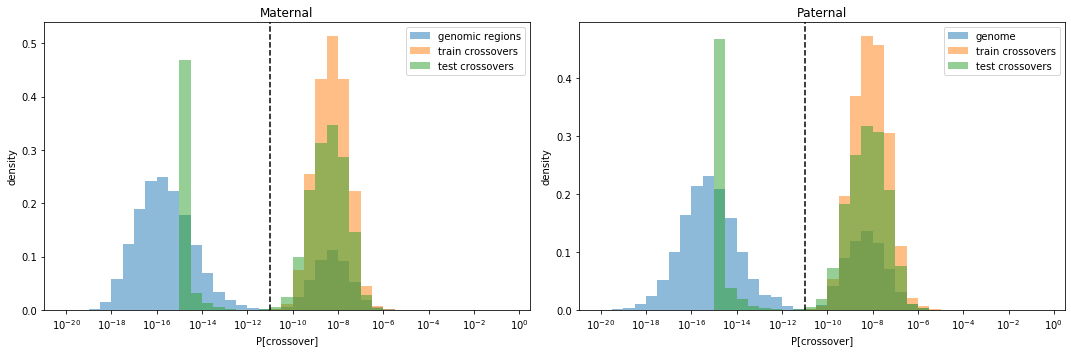

In [65]:
plt.figure(figsize=(15, 5))

bins = np.arange(-20, 0, 0.5)
k = 2
lamb = 0

plt.subplot(1, 2, 1)
#co_ps_mat_train = np.load('%s.crossover_ps_mat_train.%.0f.%d.npy' % (recomb_file, lamb, k))
#co_ps_mat_test = np.load('%s.crossover_ps_mat_test.%.0f.%d.npy' % (recomb_file, lamb, k))

X_mat_train = sparse.load_npz('%s.X_mat_train.%.0f.%d.npz' % (recomb_file, lamb, k))
X_mat_test = sparse.load_npz('%s.X_mat_test.%.0f.%d.npz' % (recomb_file, lamb, k))

ps_mat = np.load('%s.ps_mat.%.0f.%d.npy' % (recomb_file, lamb, k))
plt.hist(np.log10(ps_mat)-np.log10(lengths), alpha=0.5, bins=bins, density=True, label='genomic regions')
    
co_ps_mat_train = X_mat_train.dot(ps_mat)
co_lengths_mat_train = X_mat_train.dot(lengths)
co_ps_mat_test = X_mat_test.dot(ps_mat)
co_lengths_mat_test = X_mat_test.dot(lengths)

print('Maternal')
print('genome in hotspot', (ps_mat/lengths > cutoff).dot(lengths)/np.sum(lengths))
print('train crossovers in hotspot', np.sum(co_ps_mat_train/co_lengths_mat_train > cutoff)/len(co_ps_mat_train))
print('test crossovers in hotspot', np.sum(co_ps_mat_test/co_lengths_mat_test > cutoff)/len(co_ps_mat_test))
    
plt.hist(np.clip(np.log10(co_ps_mat_train) - np.log10(co_lengths_mat_train), -15, 0), alpha=0.5, bins=bins, density=True, label='train crossovers')
plt.hist(np.clip(np.log10(co_ps_mat_test) - np.log10(co_lengths_mat_test), -15, 0), alpha=0.5, bins=bins, density=True, label='test crossovers')

plt.title('Maternal')
plt.xlabel('P[crossover]')
plt.ylabel('density')
plt.xticks(np.arange(-20, 2, 2), ['$10^{%d}$' % x for x in np.arange(-20, 2, 2)])
plt.legend()
plt.axvline(np.log10(cutoff), color='black', linestyle='--')

plt.subplot(1, 2, 2)
#co_ps_pat_train = np.load('%s.crossover_ps_pat_train.%.0f.%d.npy' % (recomb_file, lamb, k))
#co_ps_pat_test = np.load('%s.crossover_ps_pat_test.%.0f.%d.npy' % (recomb_file, lamb, k))
    
X_pat_train = sparse.load_npz('%s.X_pat_train.%.0f.%d.npz' % (recomb_file, lamb, k))
X_pat_test = sparse.load_npz('%s.X_pat_test.%.0f.%d.npz' % (recomb_file, lamb, k))
    
ps_pat = np.load('%s.ps_pat.%.0f.%d.npy' % (recomb_file, lamb, k))
plt.hist(np.log10(ps_pat)-np.log10(lengths), alpha=0.5, bins=bins, density=True, label='genome')

co_ps_pat_train = X_pat_train.dot(ps_pat)
co_lengths_pat_train = X_pat_train.dot(lengths)
co_ps_pat_test = X_pat_test.dot(ps_pat)
co_lengths_pat_test = X_pat_test.dot(lengths)
 
print('Paternal')
print('genome in hotspot', (ps_pat/lengths > cutoff).dot(lengths)/np.sum(lengths))
print('train crossovers in hotspot', np.sum(co_ps_pat_train/co_lengths_pat_train > cutoff)/len(co_ps_pat_train))
print('test crossovers in hotspot', np.sum(co_ps_pat_test/co_lengths_pat_test > cutoff)/len(co_ps_pat_test))

plt.hist(np.clip(np.log10(co_ps_pat_train) - np.log10(co_lengths_pat_train), -15, 0), alpha=0.5, bins=bins, density=True, label='train crossovers')
plt.hist(np.clip(np.log10(co_ps_pat_test) - np.log10(co_lengths_pat_test), -15, 0), alpha=0.5, bins=bins, density=True, label='test crossovers')

plt.title('Paternal')
plt.xlabel('P[crossover]')
plt.xticks(np.arange(-20, 2, 2), ['$10^{%d}$' % x for x in np.arange(-20, 2, 2)])
plt.ylabel('density')
plt.legend()  
plt.axvline(np.log10(cutoff), color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [63]:
genome_in_hotspot_mat, genome_in_hotspot_pat = [], []
co_in_hotspot_mat_train, co_in_hotspot_pat_train = [], []
co_in_hotspot_mat_test, co_in_hotspot_pat_test = [], []

for k in range(kfolds):
    X_mat_train = sparse.load_npz('%s.X_mat_train.%.0f.%d.npz' % (recomb_file, lamb, k))
    X_mat_test = sparse.load_npz('%s.X_mat_test.%.0f.%d.npz' % (recomb_file, lamb, k))

    ps_mat = np.load('%s.ps_mat.%.0f.%d.npy' % (recomb_file, lamb, k))

    co_ps_mat_train = X_mat_train.dot(ps_mat)
    co_lengths_mat_train = X_mat_train.dot(lengths)
    co_ps_mat_test = X_mat_test.dot(ps_mat)
    co_lengths_mat_test = X_mat_test.dot(lengths)
    
    genome_in_hotspot_mat.append((ps_mat/lengths > cutoff).dot(lengths)/np.sum(lengths))
    co_in_hotspot_mat_train.append(np.sum(co_ps_mat_train/co_lengths_mat_train > cutoff)/len(co_ps_mat_train))
    co_in_hotspot_mat_test.append(np.sum(co_ps_mat_test/co_lengths_mat_test > cutoff)/len(co_ps_mat_test))
    
    X_pat_train = sparse.load_npz('%s.X_pat_train.%.0f.%d.npz' % (recomb_file, lamb, k))
    X_pat_test = sparse.load_npz('%s.X_pat_test.%.0f.%d.npz' % (recomb_file, lamb, k))

    ps_pat = np.load('%s.ps_pat.%.0f.%d.npy' % (recomb_file, lamb, k))

    co_ps_pat_train = X_pat_train.dot(ps_pat)
    co_lengths_pat_train = X_pat_train.dot(lengths)
    co_ps_pat_test = X_pat_test.dot(ps_pat)
    co_lengths_pat_test = X_pat_test.dot(lengths)
    
    genome_in_hotspot_pat.append((ps_pat/lengths > cutoff).dot(lengths)/np.sum(lengths))
    co_in_hotspot_pat_train.append(np.sum(co_ps_pat_train/co_lengths_pat_train > cutoff)/len(co_ps_pat_train))
    co_in_hotspot_pat_test.append(np.sum(co_ps_pat_test/co_lengths_pat_test > cutoff)/len(co_ps_pat_test))

//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in greater


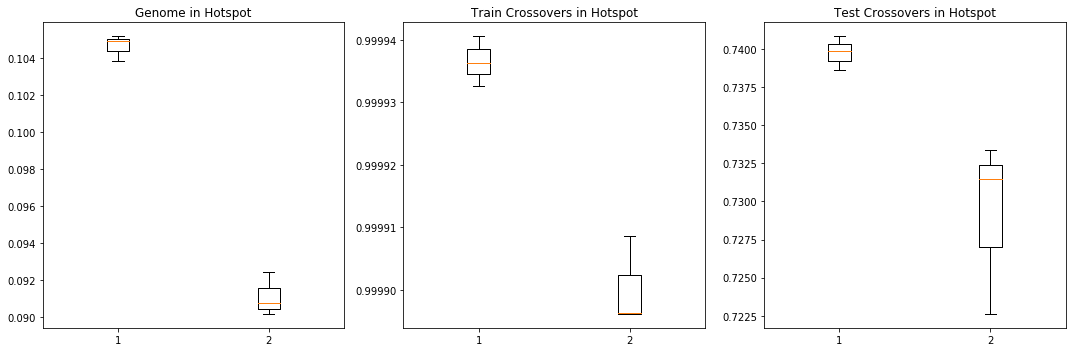

In [68]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot([genome_in_hotspot_mat, genome_in_hotspot_pat])
plt.title('Genome in Hotspot')
plt.subplot(1, 3, 2)
plt.boxplot([co_in_hotspot_mat_train, co_in_hotspot_pat_train])
plt.title('Train Crossovers in Hotspot')
plt.subplot(1, 3, 3)
plt.boxplot([co_in_hotspot_mat_test, co_in_hotspot_pat_test])
plt.title('Test Crossovers in Hotspot')

plt.tight_layout()
plt.show()

In [ ]:
print()